# Income Age 2020

In [12]:
# Dependencies
import requests
import pandas as pd
from census import Census
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [13]:
# Import U.S. Census API Key
from config import census_key

# Create an instance of the Census library
c = Census(
    census_key,
    year = 2020
)

In [14]:
# Run Census Search to retrieve data on all states (2016 ACS5 Census)
census_data = c.acs5.get(
    (
        "NAME",
        "B19049_001E",
        "B19049_002E",
        "B19049_003E",
        "B19049_004E",
        "B19049_005E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
income_age_2020 = pd.DataFrame(census_data)

# Column renaming
income_age_2020 = income_age_2020.rename(
    columns = {
        "B19049_001E": "Household Income Total",
        "B19049_002E": "Household Income Under 25 years",
        "B19049_003E": "Household Income 25 to 44 years",
        "B19049_004E": "Household Income 45 to 64 years",
        "B19049_005E": "Household Income 65 years and over",
        "NAME": "Name"
    }
)


# Configure the final DataFrame
income_age_2020 = income_age_2020[
    [
        "Name",
        "Household Income Total",
        "Household Income Under 25 years",
        "Household Income 25 to 44 years",
        "Household Income 45 to 64 years",
        "Household Income 65 years and over"
    ]
]

# Rename name to state
income_age_2020 = income_age_2020.rename(columns={"Name":"State"})

# Display DataFrame length and sample data
print(f"Number of rows in the DataFrame: {len(income_age_2020)}")
income_age_2020

Number of rows in the DataFrame: 52


,State,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,63627.0,32905.0,73230.0,78215.0,44143.0
1,California,78672.0,41045.0,84076.0,92828.0,57034.0
2,West Virginia,48037.0,26541.0,56539.0,56048.0,38235.0
3,Utah,74197.0,40500.0,78035.0,92923.0,55560.0
4,New York,71117.0,36514.0,81159.0,84446.0,48539.0
5,District of Columbia,90842.0,44256.0,105346.0,99304.0,59428.0
6,Alaska,77790.0,45806.0,82116.0,93859.0,61223.0
7,Florida,57703.0,33820.0,62440.0,68016.0,46182.0
8,South Carolina,54864.0,30987.0,60452.0,64299.0,43822.0
9,North Dakota,65315.0,38725.0,74093.0,81860.0,45849.0


In [15]:
# Read in the housing listing prices to compare to income by age
listing_prices = pd.read_csv("output_data/Median Listing Prices.csv")

In [16]:
income_age = pd.merge(income_age_2020, listing_prices, on=('State'), how='right')

income_age = income_age[["State",
                         "Year_Month_2020",
                         "Median Listing Price_2020",
                         "Household Income Total",
                         "Household Income Under 25 years",
                         "Household Income 25 to 44 years",
                         "Household Income 45 to 64 years",
                         "Household Income 65 years and over"
                        ]]

income_age["Median Listing Price_2020"] = income_age["Median Listing Price_2020"].map("${:,.2f}".format)
income_age["Household Income Total"] = income_age["Household Income Total"].map("${:,.2f}".format)
income_age["Household Income Under 25 years"] = income_age["Household Income Under 25 years"].map("${:,.2f}".format)
income_age["Household Income 25 to 44 years"] = income_age["Household Income 25 to 44 years"].map("${:,.2f}".format)
income_age["Household Income 45 to 64 years"] = income_age["Household Income 45 to 64 years"].map("${:,.2f}".format)
income_age["Household Income 65 years and over"] = income_age["Household Income 65 years and over"].map("${:,.2f}".format)

income_age

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
0,Pennsylvania,202012,"$259,900.00","$63,627.00","$32,905.00","$73,230.00","$78,215.00","$44,143.00"
1,Utah,202012,"$531,450.00","$74,197.00","$40,500.00","$78,035.00","$92,923.00","$55,560.00"
2,New York,202012,"$569,000.00","$71,117.00","$36,514.00","$81,159.00","$84,446.00","$48,539.00"
3,Colorado,202012,"$510,500.00","$75,231.00","$39,484.00","$81,237.00","$90,347.00","$54,544.00"
4,West Virginia,202012,"$165,000.00","$48,037.00","$26,541.00","$56,539.00","$56,048.00","$38,235.00"
5,Florida,202012,"$342,250.00","$57,703.00","$33,820.00","$62,440.00","$68,016.00","$46,182.00"
6,Wyoming,202012,"$265,000.00","$65,304.00","$31,642.00","$75,858.00","$78,584.00","$47,223.00"
7,Minnesota,202012,"$299,650.00","$73,382.00","$40,813.00","$83,759.00","$90,158.00","$49,601.00"
8,Kansas,202012,"$195,125.00","$61,091.00","$34,184.00","$67,765.00","$74,733.00","$45,777.00"
9,Virginia,202012,"$344,995.00","$76,398.00","$38,463.00","$82,453.00","$93,370.00","$54,826.00"


In [17]:
# Select certain states to pull data from
selected_states = ["California", "Texas", "New York", "Florida", "Illinois"]
selected_housing = income_age[income_age["State"].isin(selected_states)]
selected_housing

,State,Year_Month_2020,Median Listing Price_2020,Household Income Total,Household Income Under 25 years,Household Income 25 to 44 years,Household Income 45 to 64 years,Household Income 65 years and over
2,New York,202012,"$569,000.00","$71,117.00","$36,514.00","$81,159.00","$84,446.00","$48,539.00"
5,Florida,202012,"$342,250.00","$57,703.00","$33,820.00","$62,440.00","$68,016.00","$46,182.00"
12,California,202012,"$704,450.00","$78,672.00","$41,045.00","$84,076.00","$92,828.00","$57,034.00"
20,Illinois,202012,"$259,450.00","$68,428.00","$32,544.00","$75,867.00","$83,485.00","$48,066.00"
34,Texas,202012,"$299,900.00","$63,826.00","$33,040.00","$67,635.00","$76,623.00","$47,004.00"


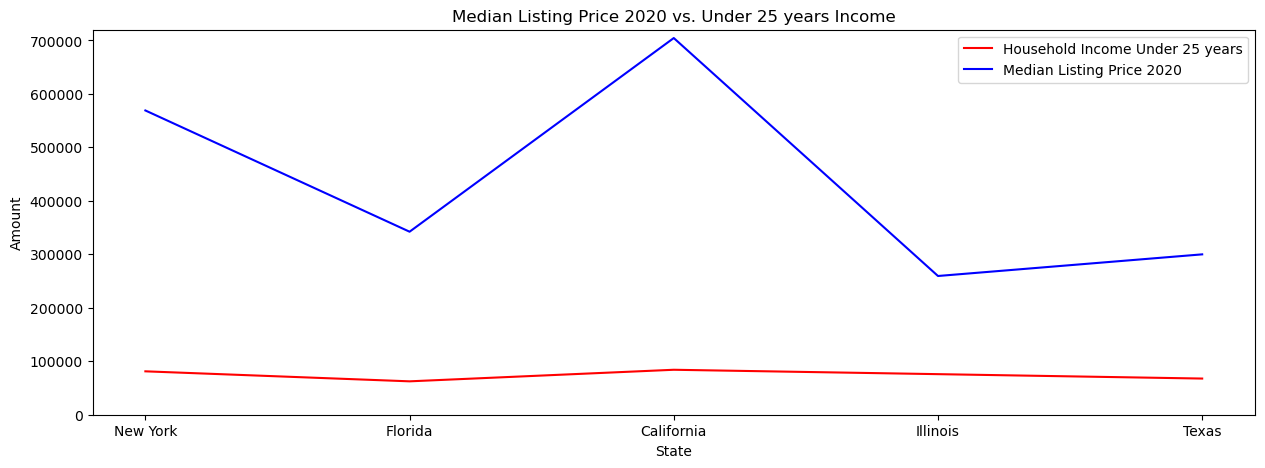

In [20]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Household Income Under 25 years"] = selected_housing["Household Income Under 25 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income Under 25 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. Under 25 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig13.png")
plt.show()

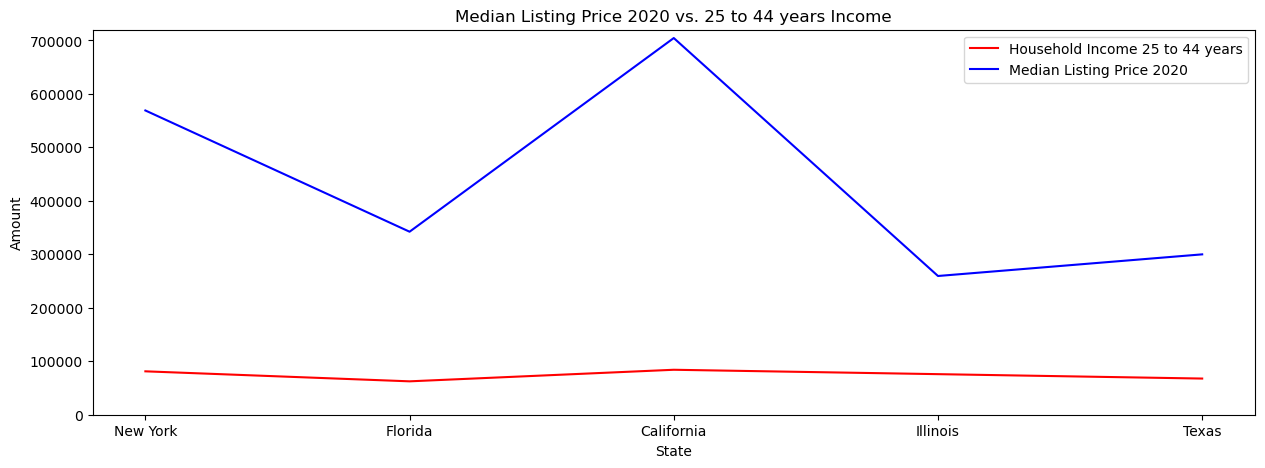

In [19]:
# Plot the difference between house listings and income by age
x_value = selected_housing['State']
selected_housing["Median Listing Price_2020"] = selected_housing["Median Listing Price_2020"].replace('[\$,]', '', regex=True).astype(float)
y_value = selected_housing['Median Listing Price_2020']
x_value2 = selected_housing['State']
selected_housing["Household Income 25 to 44 years"] = selected_housing["Household Income 25 to 44 years"].replace('[\$,]', '', regex=True).astype(float)
y_value2 = selected_housing['Household Income 25 to 44 years']
plt.plot(x_value2,y_value2, color="red", label="Household Income 25 to 44 years")
plt.plot(x_value,y_value, color="blue", label="Median Listing Price 2020")
plt.title("Median Listing Price 2020 vs. 25 to 44 years Income")
plt.xlabel("State")
plt.ylabel("Amount")
plt.ylim([0,720000])
plt.legend(loc="upper right")
plt.rcParams["figure.figsize"] = (15,5)
plt.savefig("output_data/Fig4.png")
plt.show()